<a href="https://colab.research.google.com/github/AHS1993/AmirHosseinSoltanzadehINSE6220/blob/main/AmirHossein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is lab

Import Python Modules



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()

Upload files into Colaboratory



In [2]:
from google.colab import files
uploaded = files.upload()

Saving bodymovement.csv to bodymovement.csv


Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Saving airquality.csv to airquality.csv

In [3]:
#read cvs file into dataframe
df = pd.read_csv('/content/bodymovement.csv', index_col=0)
##!pip install xlrd
##df = pd.read_excel('airquality.xls')
print(df.head())

      Class   R   N   T  Sh   P
U Id                           
U 1       2  77  79  69  68  95
U 2       2  62  76  76  69  68
U 3       2  50  97  87  50  75
U 4       2  68  77  95  76  61
U 5       2  98  54  59  95  86


In [4]:
#m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data

In [5]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, U 1 to U 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   249 non-null    float64
 1   R       249 non-null    float64
 2   N       249 non-null    float64
 3   T       249 non-null    float64
 4   Sh      249 non-null    float64
 5   P       249 non-null    float64
dtypes: float64(6)
memory usage: 13.6+ KB


Observations and variables



In [6]:
observations = list(df.index)
variables = list(df.columns)

Data Visualisation



<Axes: >

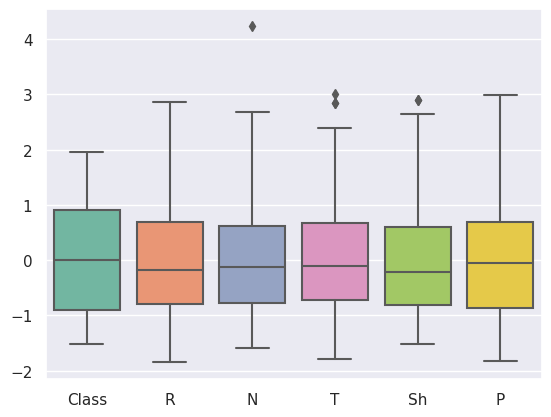

In [7]:
sns.boxplot(data=df, orient="v", palette="Set2")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.

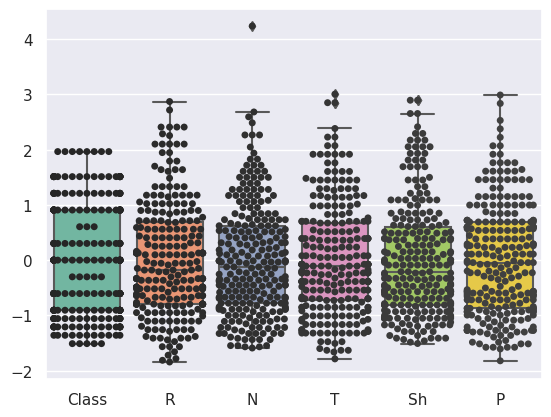

In [8]:

##Use swarmplot() to show the datapoints on top of the boxes:
#plt. figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25") 

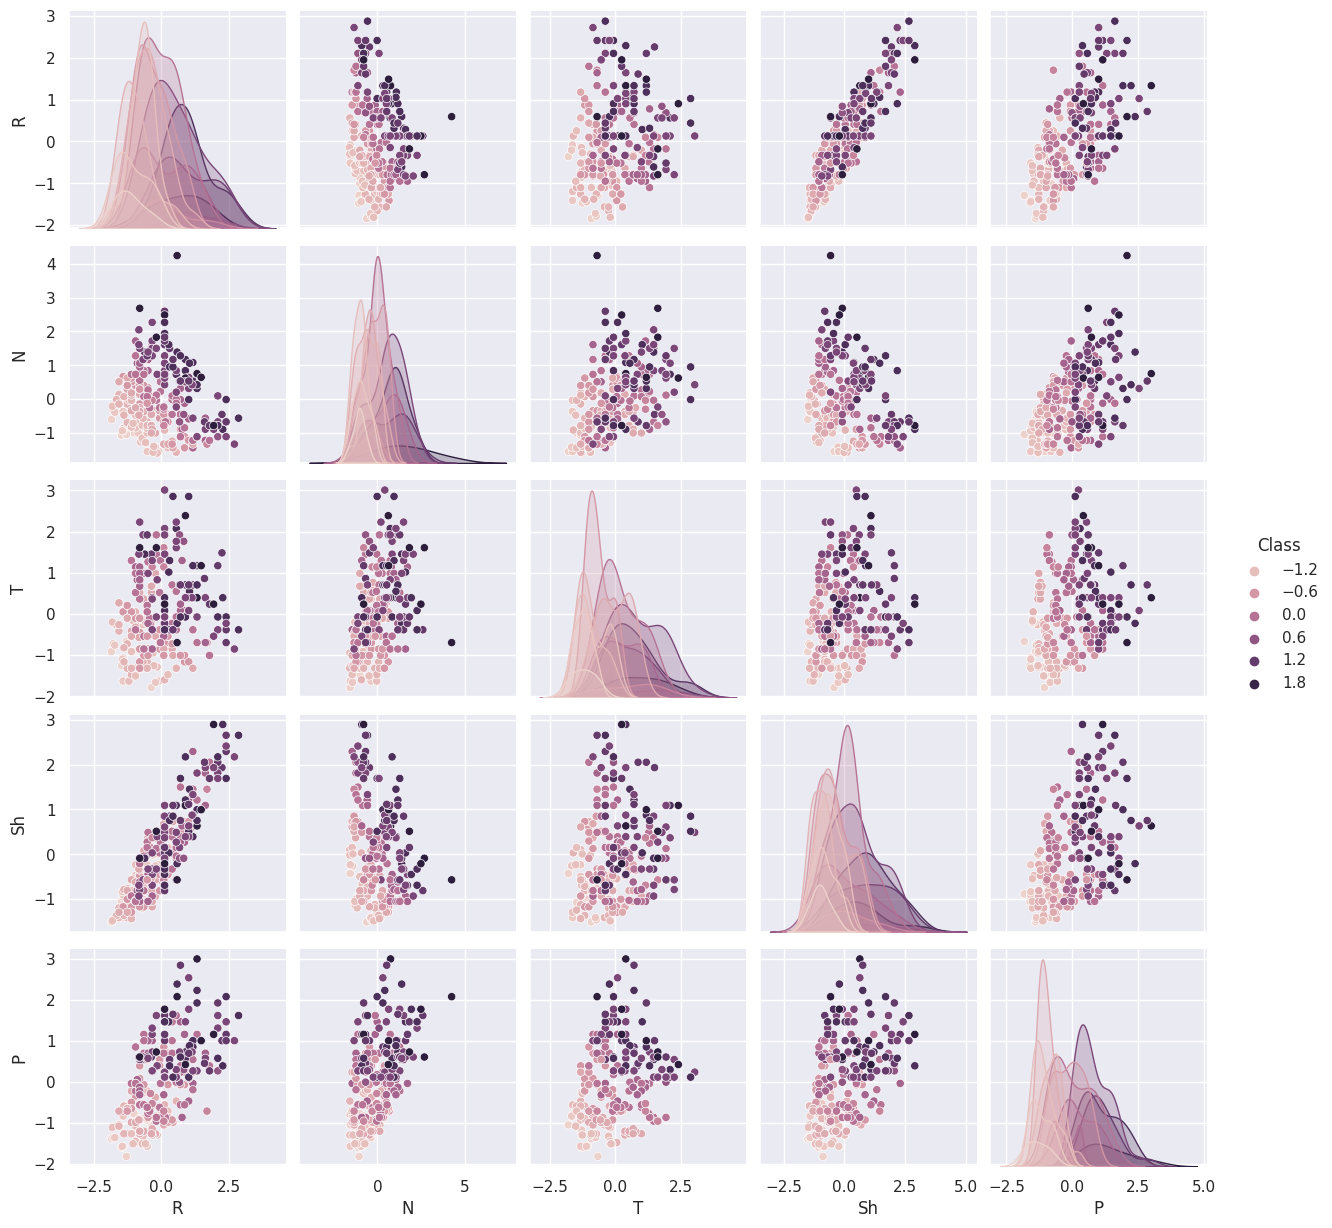

In [9]:
sns.pairplot(df, hue='Class')
plt.show()

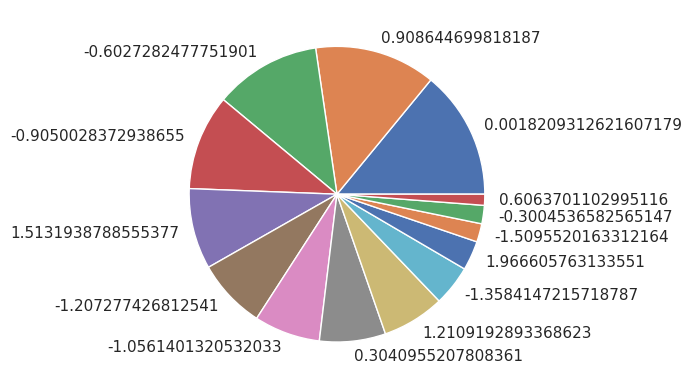

In [10]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [11]:
X = df.drop(columns=['Class'])
X.head(10)

,R,N,T,Sh,P
U Id,,,,,
U 1,-1.010014,-0.997342,-1.474433,-1.074000,-0.778394
U 2,-1.472205,-1.063075,-1.256586,-1.049940,-1.605769
U 3,-1.841958,-0.602946,-0.914256,-1.507079,-1.391264
U 4,-1.287329,-1.041164,-0.665288,-0.881521,-1.820274
U 5,-0.362947,-1.545115,-1.785643,-0.424382,-1.054186
U 6,-1.780333,-0.340015,-0.727530,-1.458959,-1.360621
U 7,-1.410580,-0.865877,-1.069861,-0.953701,-1.575126
U 8,-1.718707,-0.383837,-0.758651,-1.410839,-1.360621
U 9,-1.410580,-0.361926,-1.630038,-1.410839,-0.839681


In [12]:
X.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
R,249.0,5.707171e-17,1.0,-1.841958,-0.794325,-0.178070,0.684686,2.872390
N,249.0,1.426793e-16,1.0,-1.588937,-0.778233,-0.120906,0.624065,4.239364
T,249.0,0.000000e+00,1.0,-1.785643,-0.727530,-0.105111,0.672912,3.006984
Sh,249.0,-1.426793e-16,1.0,-1.507079,-0.809341,-0.207843,0.610195,2.895887
P,249.0,1.141434e-16,1.0,-1.820274,-0.870325,-0.042950,0.692494,2.990757


In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

NameError: ignored

In [13]:
X.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
R,249.0,5.707171e-17,1.0,-1.841958,-0.794325,-0.178070,0.684686,2.872390
N,249.0,1.426793e-16,1.0,-1.588937,-0.778233,-0.120906,0.624065,4.239364
T,249.0,0.000000e+00,1.0,-1.785643,-0.727530,-0.105111,0.672912,3.006984
Sh,249.0,-1.426793e-16,1.0,-1.507079,-0.809341,-0.207843,0.610195,2.895887
P,249.0,1.141434e-16,1.0,-1.820274,-0.870325,-0.042950,0.692494,2.990757


Text(0, 0.5, 'Z2')

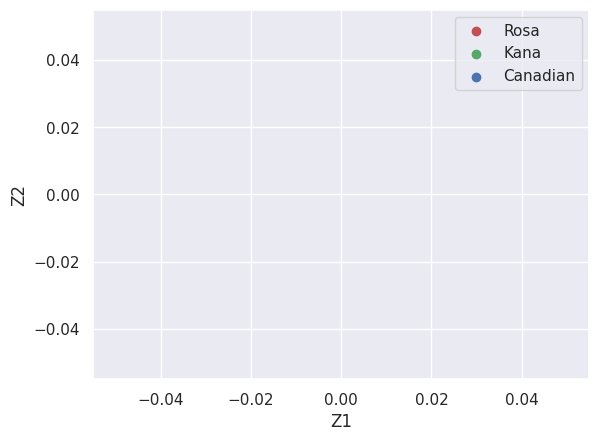

In [14]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')


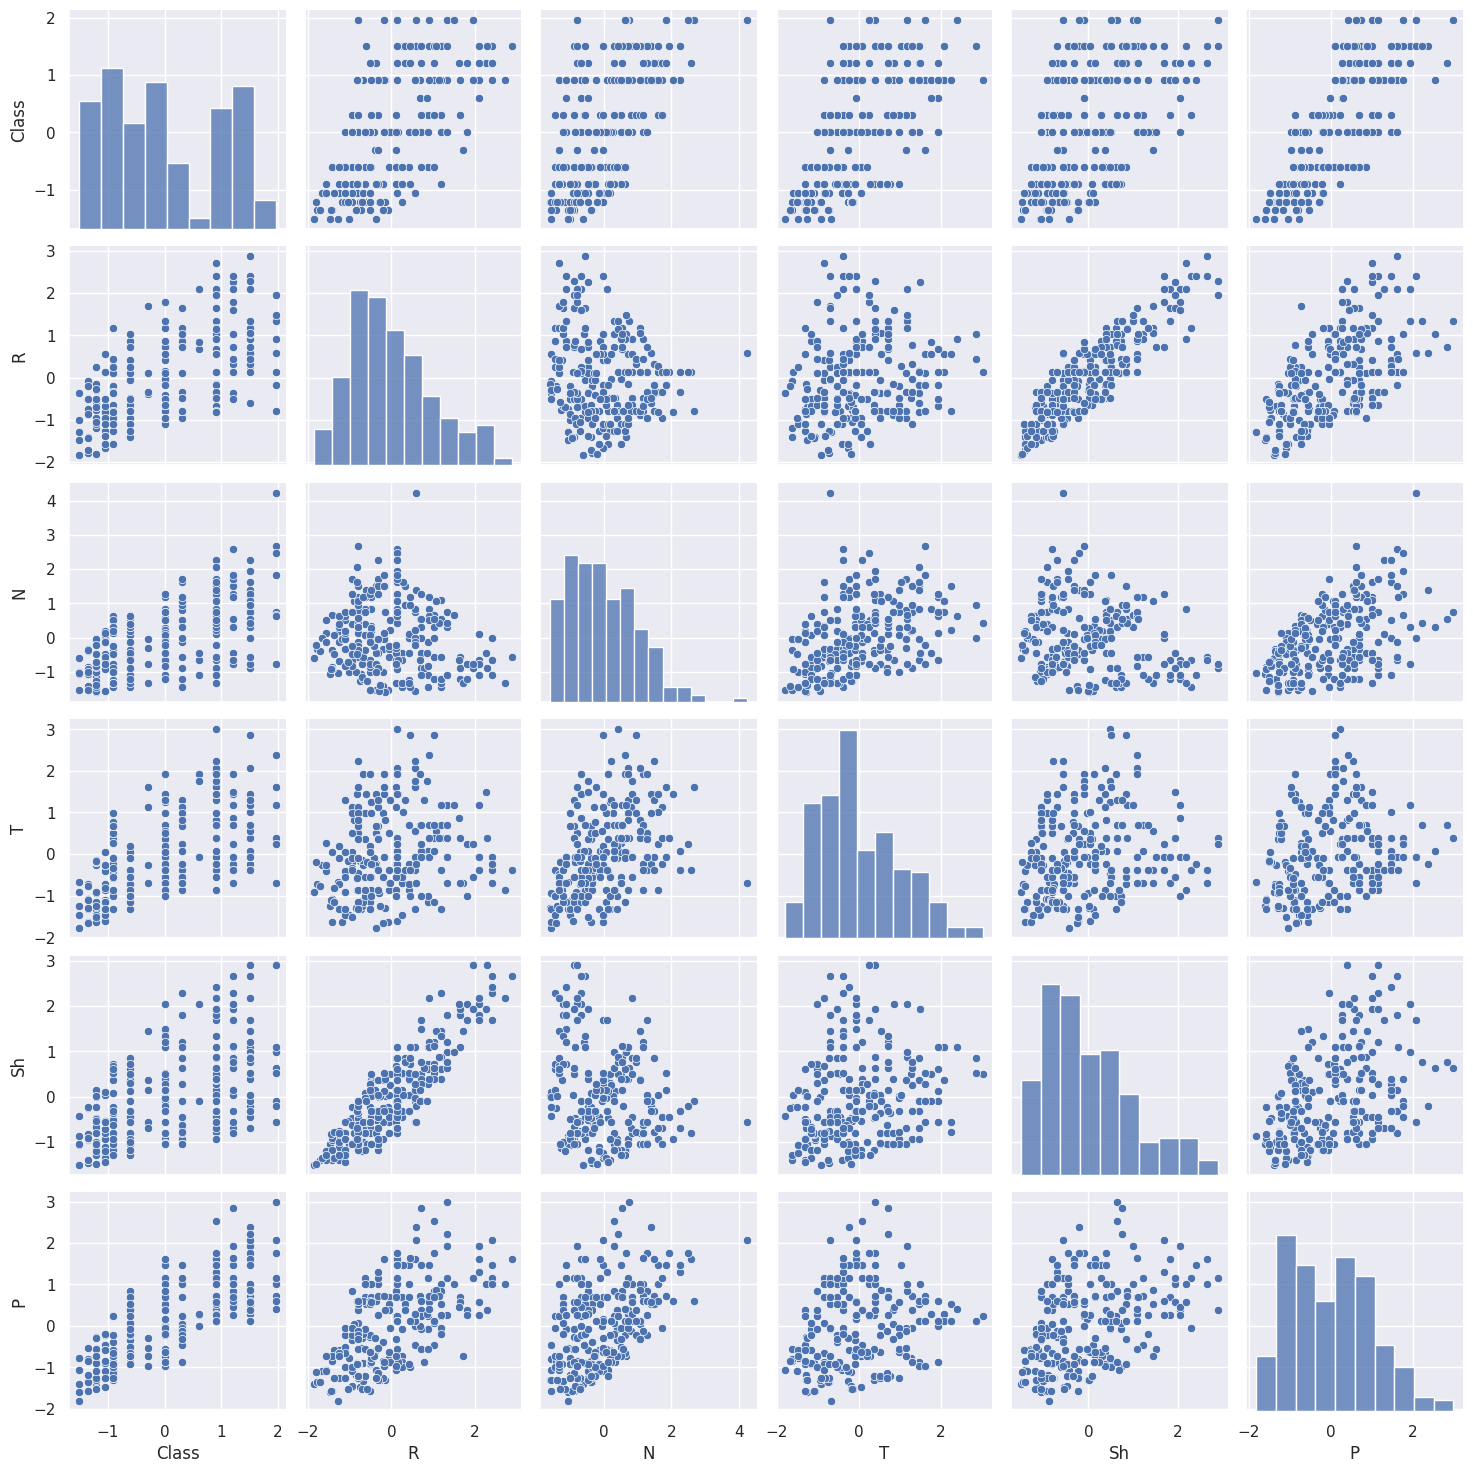

In [15]:
#pairplot
sns.pairplot(df)

Covariance

Text(0.5, 1.0, 'Covariance matrix')

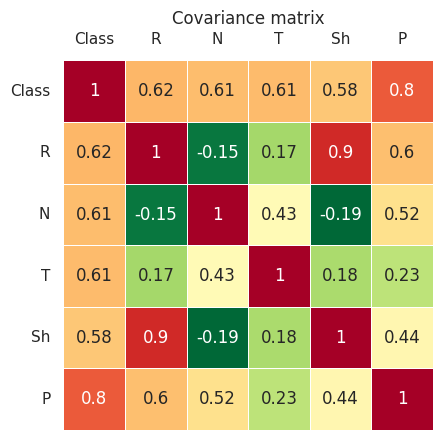

In [16]:

dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Covariance matrix')
     

Principal component analysis



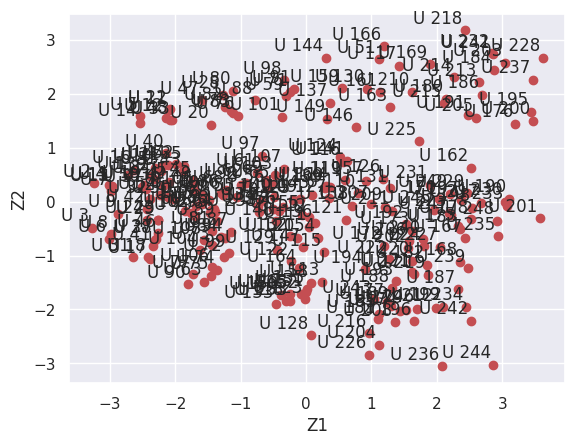

In [17]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('Z1')
plt.ylabel('Z2')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

Eigenvectors

In [18]:

X = np.array([23, 4, 29, 44, 47, 24, 40, 23, 23, 44, 33, 27, 60, 46, 61, 11, 23, 62, 31, 44, 77, 14, 65, 42])
#X = np.array([99, 85, 86, 71, 82, 95, 108, 87, 89, 89, 78, 86])
#X = np.array([12, 12, 12, 14, 15, 16, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 20, 
#              20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 23, 24, 24, 25, 26, 26, 28, 28, 28])			  
#X = np.random.poisson(35, 15)

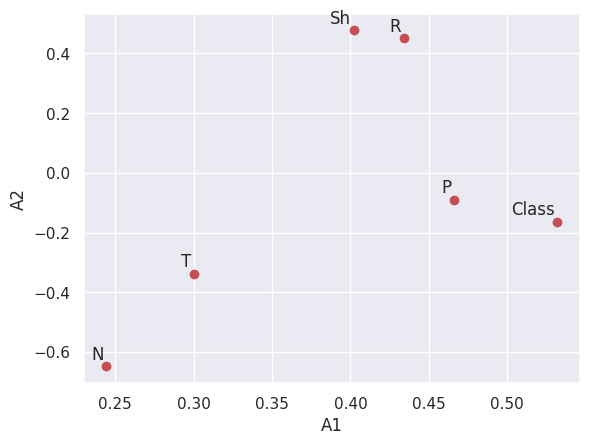

In [19]:
A = pca.components_.T 
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


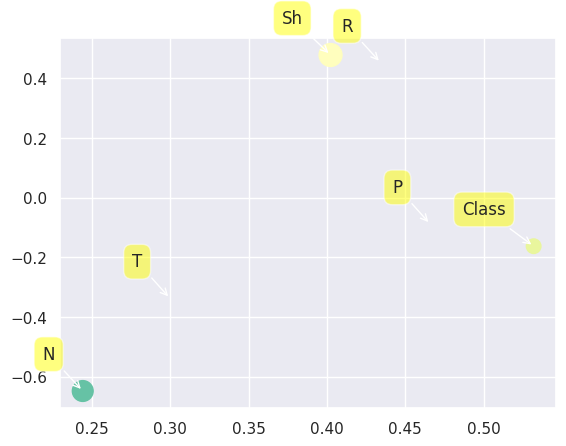

In [20]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot



Text(0, 0.5, 'Explained variance')

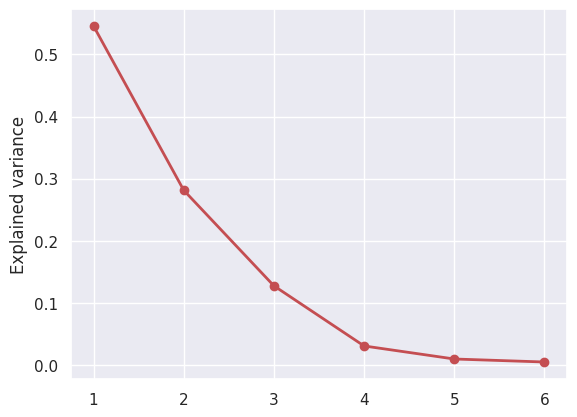

In [21]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Explaiend Variance



Text(0, 0.5, 'Explained\xa0variance')

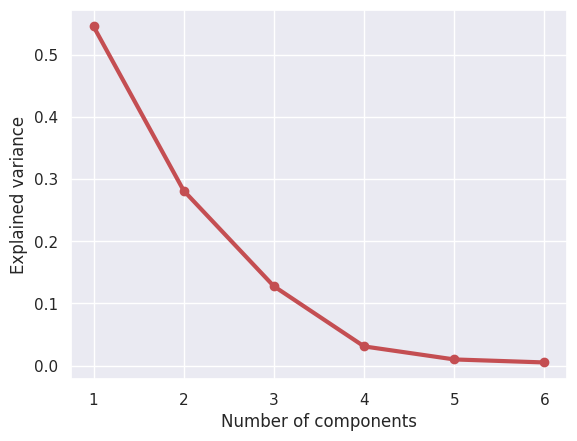

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

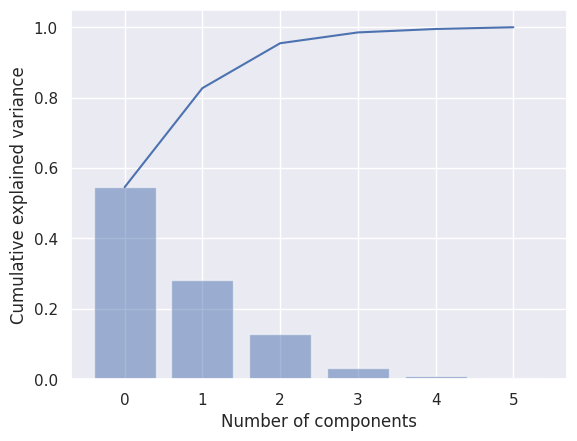

In [23]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'Explained\xa0variance')

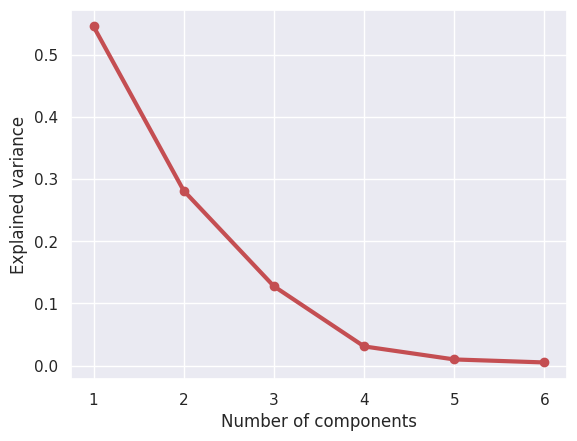

In [24]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Biplot

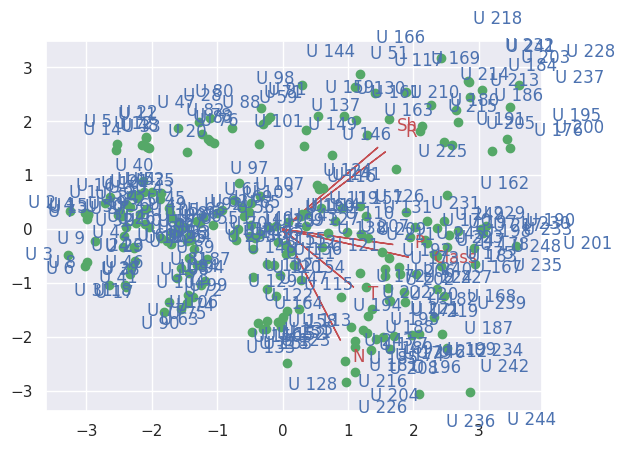

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

Principal components



Text(0.5, 1.0, 'Principal components')

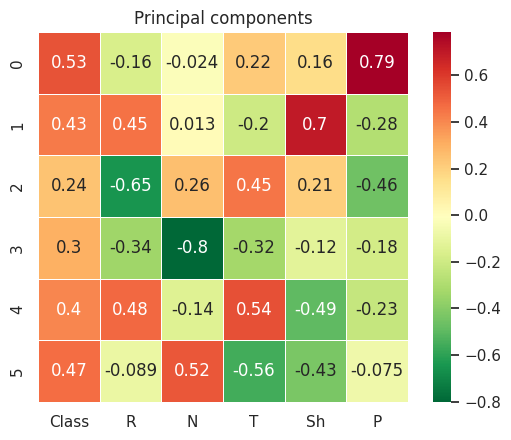

In [26]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

# New Section

In [27]:
# install slim version (default): if you get an error message, run it again:
#!pip3 install pycaret

In [28]:
#Run the below code in your notebook to check the installed version
#from pycaret.utils import version
#version()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

#read cvs file into dataframe
url='https://drive.google.com/file/d/1PkrEKTP58Ind9OCZaUSCNAQqdOwVip6X/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df=pd.read_csv(url)
df.head(25)

,U Id,Class,R,N,T,Sh,P
0,U 1,2,77,79,69,68,95
1,U 2,2,62,76,76,69,68
2,U 3,2,50,97,87,50,75
3,U 4,2,68,77,95,76,61
4,U 5,2,98,54,59,95,86
5,U 6,3,52,109,93,52,76
6,U 7,3,64,85,82,73,69
7,U 8,3,54,107,92,54,76
8,U 9,3,64,108,64,54,93
9,U 10,3,86,76,74,74,103


In [30]:
#For Google Colab only
# !pip install scikit-learn==0.23.2
!pip3 install pycaret==2.3.6
!pip install pycaret[analysis]
!pip install shap
#from pycaret.utils import enable_colab

#enable_colab() 

#!pip install schemdraw<0.16

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 61.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from pycaret.utils import *
from pycaret.classification import *

version()
clf = setup(data=df, target="Class", train_size=0.7, session_id=123)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f0d697793f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 8: 5, 10: 6, 12: 7, 14: 8, 16: 9, 18: 10, 20: 11, 22: 12, 25: 13"
4,Original data shape,"(249, 7)"
5,Transformed data shape,"(249, 7)"
6,Transformed train set shape,"(174, 7)"
7,Transformed test set shape,"(75, 7)"
8,Numeric features,5
9,Categorical features,1


In [32]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5392,0.0000,0.5392,0.4888,0.4818,0.4888,0.5030,0.1250
et,Extra Trees Classifier,0.5121,0.0000,0.5121,0.4591,0.4612,0.4548,0.4656,0.6740
rf,Random Forest Classifier,0.4889,0.0000,0.4889,0.4342,0.4353,0.4301,0.4413,0.4170
lightgbm,Light Gradient Boosting Machine,0.4637,0.0000,0.4637,0.4182,0.4172,0.4018,0.4109,0.7100
dt,Decision Tree Classifier,0.4438,0.0000,0.4438,0.4358,0.4116,0.3827,0.3936,0.2570
xgboost,Extreme Gradient Boosting,0.4190,0.0000,0.4190,0.3602,0.3630,0.3529,0.3652,0.3950
gbc,Gradient Boosting Classifier,0.4033,0.0000,0.4033,0.3342,0.3533,0.3340,0.3424,3.0290
nb,Naive Bayes,0.3784,0.0000,0.3784,0.3358,0.3320,0.3125,0.3235,0.2400
knn,K Neighbors Classifier,0.3739,0.0000,0.3739,0.3340,0.3304,0.3029,0.3122,0.2160
lr,Logistic Regression,0.3722,0.0000,0.3722,0.3477,0.3338,0.3017,0.3120,0.5640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca1, best_model_pca2, best_model_pca3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5392,0.0000,0.5392,0.4888,0.4818,0.4888,0.5030,0.1360
et,Extra Trees Classifier,0.5121,0.0000,0.5121,0.4591,0.4612,0.4548,0.4656,0.2680
rf,Random Forest Classifier,0.4889,0.0000,0.4889,0.4342,0.4353,0.4301,0.4413,0.3410
lightgbm,Light Gradient Boosting Machine,0.4637,0.0000,0.4637,0.4182,0.4172,0.4018,0.4109,0.6080
dt,Decision Tree Classifier,0.4438,0.0000,0.4438,0.4358,0.4116,0.3827,0.3936,0.1990
xgboost,Extreme Gradient Boosting,0.4190,0.0000,0.4190,0.3602,0.3630,0.3529,0.3652,0.1820
gbc,Gradient Boosting Classifier,0.4033,0.0000,0.4033,0.3342,0.3533,0.3340,0.3424,1.4270
nb,Naive Bayes,0.3784,0.0000,0.3784,0.3358,0.3320,0.3125,0.3235,0.1250
knn,K Neighbors Classifier,0.3739,0.0000,0.3739,0.3340,0.3304,0.3029,0.3122,0.1450
lr,Logistic Regression,0.3722,0.0000,0.3722,0.3477,0.3338,0.3017,0.3120,0.1400


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [33]:
best_model_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [34]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6528,0.6243,0.6301,0.6390
1,0.4444,0.0000,0.4444,0.5370,0.4407,0.4020,0.4202
2,0.6667,0.0000,0.6667,0.6296,0.6296,0.6314,0.6379
3,0.5556,0.0000,0.5556,0.5259,0.4987,0.5102,0.5322
4,0.6471,0.0000,0.6471,0.6863,0.6392,0.6092,0.6187
5,0.5882,0.0000,0.5882,0.5196,0.5087,0.5333,0.5510
6,0.1765,0.0000,0.1765,0.0571,0.0859,0.0846,0.0958
7,0.4706,0.0000,0.4706,0.3676,0.4101,0.3976,0.4025
8,0.6471,0.0000,0.6471,0.5294,0.5490,0.6062,0.6285


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
#trained model object is stored in the variable 'lda'. 
lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [36]:
!pip install scikit-optimize
!pip install tune-sklearn ray[tune]
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 12.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 109.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 55.8 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.54.0
    Uninstalling grpcio-1.54.0:
      Successfully uninstalled grpcio-1.54.0
/bi

In [ ]:
tuned_lda = tune_model(lda, search_library="tune-sklearn")

ModuleNotFoundError: ignored

In [ ]:
#tuned model object is stored in the variable 'tuned_lda'. 
tuned_lda

NameError: ignored

In [37]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.0000,0.7222,0.6528,0.6799,0.6897,0.6945
1,0.5556,0.0000,0.5556,0.5370,0.5056,0.5068,0.5213
2,0.7222,0.0000,0.7222,0.6296,0.6630,0.6886,0.6985
3,0.5556,0.0000,0.5556,0.4657,0.4769,0.5034,0.5219
4,0.5882,0.0000,0.5882,0.4510,0.5020,0.5423,0.5645
5,0.4118,0.0000,0.4118,0.3431,0.3490,0.3385,0.3481
6,0.7059,0.0000,0.7059,0.6618,0.6650,0.6640,0.6722
7,0.5882,0.0000,0.5882,0.4559,0.5042,0.5315,0.5425
8,0.7647,0.0000,0.7647,0.7059,0.7059,0.7375,0.7522


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [39]:
tuned_best_model_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=0.2, solver='eigen',
                           store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

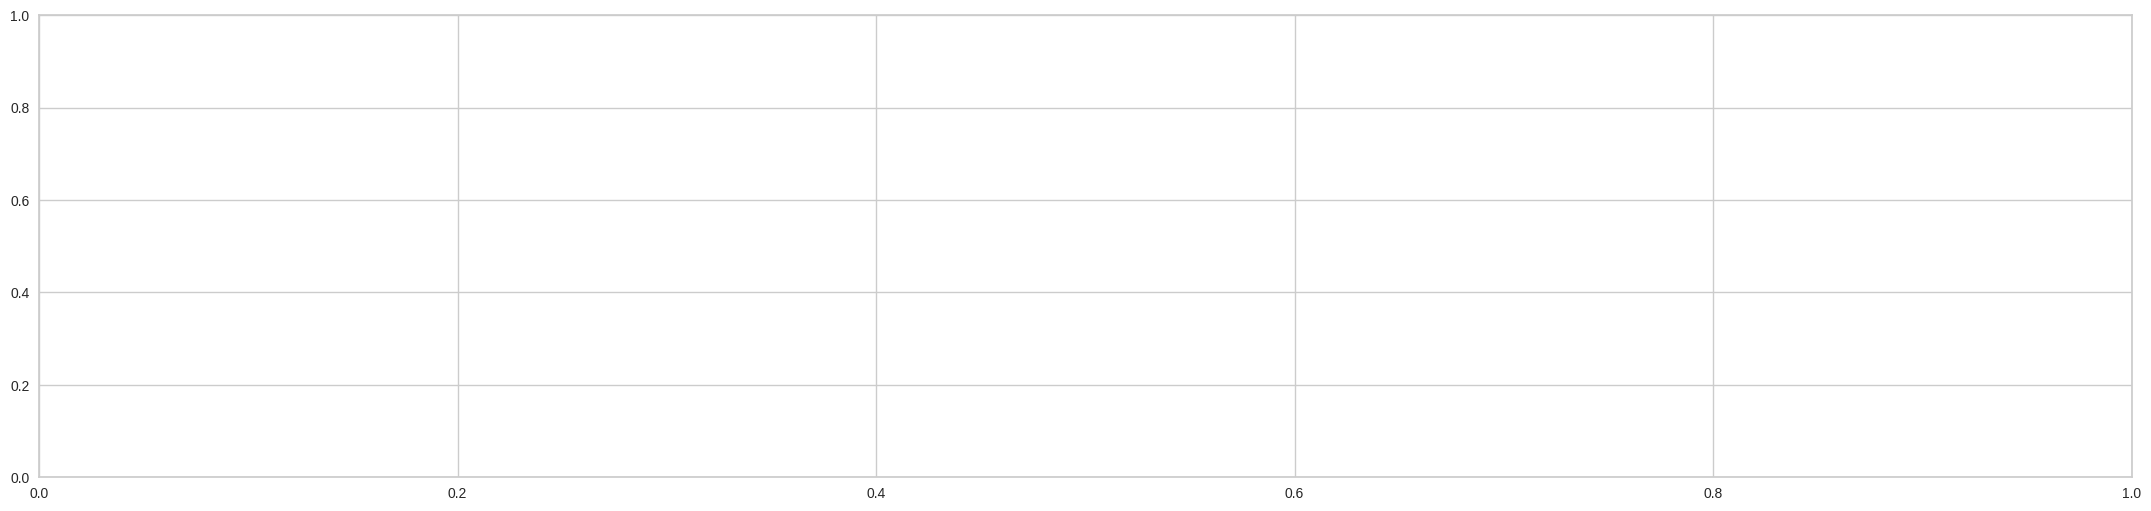

In [38]:
evaluate_model(tuned_best_model_pca)

In [40]:
#!pip3 install shap

In [41]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [42]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.0000,0.3333,0.3935,0.3259,0.2653,0.2748
1,0.5000,0.0000,0.5000,0.5000,0.4852,0.4433,0.4464
2,0.6111,0.0000,0.6111,0.4583,0.5169,0.5594,0.5720
3,0.4444,0.0000,0.4444,0.3722,0.3833,0.3728,0.3811
4,0.5294,0.0000,0.5294,0.5196,0.5059,0.4809,0.4903
5,0.4706,0.0000,0.4706,0.4608,0.4255,0.4070,0.4184
6,0.5294,0.0000,0.5294,0.3922,0.4459,0.4667,0.4781
7,0.4706,0.0000,0.4706,0.4510,0.4412,0.4070,0.4151
8,0.5294,0.0000,0.5294,0.4608,0.4431,0.4848,0.5061


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3889,0.0000,0.3889,0.3889,0.3630,0.3288,0.3380
1,0.3889,0.0000,0.3889,0.3519,0.3519,0.3378,0.3532
2,0.3889,0.0000,0.3889,0.3222,0.3413,0.3333,0.3487
3,0.3333,0.0000,0.3333,0.4074,0.3204,0.2727,0.2813
4,0.2941,0.0000,0.2941,0.3088,0.2784,0.2388,0.2490
5,0.4706,0.0000,0.4706,0.4608,0.4333,0.4160,0.4326
6,0.5294,0.0000,0.5294,0.4608,0.4863,0.4729,0.4803
7,0.3529,0.0000,0.3529,0.4216,0.3510,0.2917,0.3008
8,0.4118,0.0000,0.4118,0.4510,0.3980,0.3633,0.3805


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


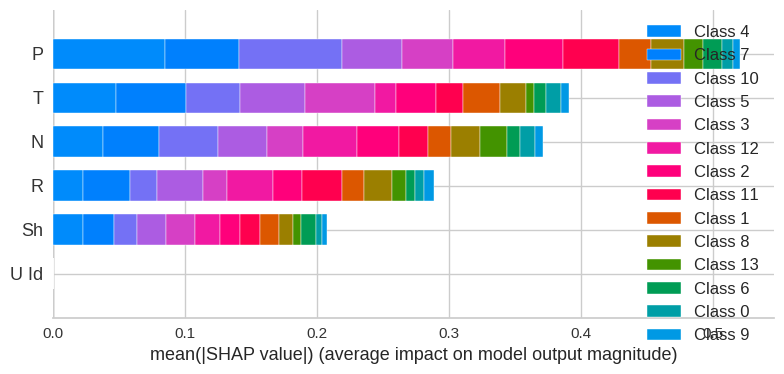

In [44]:
interpret_model(tuned_rf_pca, plot='summary')

In [45]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

In [46]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [47]:
interpret_model(tuned_rf_pca, plot='reason')